In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Imputing Null Values Using Forward Fill and Backward Fill Techniques**

In [2]:
df = pd.read_excel("C:/Users/Puja Shaw/Downloads/Data_clean_time_series.xlsx")

In [3]:
df.head()

,Location,Date,Value_lacs,Sold
0,India,2021-09-21,NaN,Yes
1,India,2021-08-22,49.0,Yes
2,India,2021-09-16,36.0,Yes
3,India,2021-10-24,NaN,No
4,India,2021-06-05,45.0,Yes


In [4]:
df.dtypes

Location              object
Date          datetime64[ns]
Value_lacs           float64
Sold                  object
dtype: object

In [5]:
df.isnull().sum()

Location      0
Date          0
Value_lacs    6
Sold          0
dtype: int64

In [6]:
df

,Location,Date,Value_lacs,Sold
0,India,2021-09-21,NaN,Yes
1,India,2021-08-22,49.0,Yes
2,India,2021-09-16,36.0,Yes
3,India,2021-10-24,NaN,No
4,India,2021-06-05,45.0,Yes
5,India,2021-11-26,NaN,No
6,India,2021-11-07,25.0,Yes
7,India,2021-12-28,76.0,Yes
8,India,2021-01-29,NaN,Yes
9,India,2021-11-30,65.0,No


In [7]:
df.Value_lacs.fillna(method='ffill') # imputing null values by forward fill method

0      NaN
1     49.0
2     36.0
3     36.0
4     45.0
5     45.0
6     25.0
7     76.0
8     76.0
9     65.0
10    18.0
11    18.0
12    22.0
13    35.0
14    35.0
Name: Value_lacs, dtype: float64

In [8]:
df.Value_lacs.fillna(method='bfill') # imputing null values by backward fill method

0     49.0
1     49.0
2     36.0
3     45.0
4     45.0
5     25.0
6     25.0
7     76.0
8     65.0
9     65.0
10    18.0
11    22.0
12    22.0
13    35.0
14     NaN
Name: Value_lacs, dtype: float64

**Cleaning Textual Data:**

In [9]:
df2= pd.read_csv("C:/Users/Puja Shaw/Downloads/demo_cat_data.csv")

In [10]:
df2

,First Name,Last Name,Org Name,Location,Job_Role
0,Kishan,Roy,CTS,Bangalore,MIS
1,Jack,Suzi,CTS_,NaN,IPC_6
2,Rose,Dwak,CTS.90,Bangalore,LTR;8
3,Sanam,Matthew,CTS,Bangalore,IPC
4,Jaan,David,CTS,Bangalore,MIS_45
5,Aneem,Roy,"a0f,CTS",NaN,TIF/
6,Jawaed,Khan,33CTS,NaN,POV
7,Natasha,Agarwal,gCTS8,Bangalore,MIS


In [11]:
df2.loc[df2['Org Name'].str.contains('CTS', case=False), 'Organisation'] = 'CTS' # adding a column

In [12]:
df2

,First Name,Last Name,Org Name,Location,Job_Role,Organisation
0,Kishan,Roy,CTS,Bangalore,MIS,CTS
1,Jack,Suzi,CTS_,NaN,IPC_6,CTS
2,Rose,Dwak,CTS.90,Bangalore,LTR;8,CTS
3,Sanam,Matthew,CTS,Bangalore,IPC,CTS
4,Jaan,David,CTS,Bangalore,MIS_45,CTS
5,Aneem,Roy,"a0f,CTS",NaN,TIF/,CTS
6,Jawaed,Khan,33CTS,NaN,POV,CTS
7,Natasha,Agarwal,gCTS8,Bangalore,MIS,CTS


In [13]:
df2= df2.drop('Org Name',axis=1) # removing the column

In [14]:
df2

,First Name,Last Name,Location,Job_Role,Organisation
0,Kishan,Roy,Bangalore,MIS,CTS
1,Jack,Suzi,NaN,IPC_6,CTS
2,Rose,Dwak,Bangalore,LTR;8,CTS
3,Sanam,Matthew,Bangalore,IPC,CTS
4,Jaan,David,Bangalore,MIS_45,CTS
5,Aneem,Roy,NaN,TIF/,CTS
6,Jawaed,Khan,NaN,POV,CTS
7,Natasha,Agarwal,Bangalore,MIS,CTS


In [15]:
df2.Location=df2.Location.fillna('Bangalore') #Filling unknown value in location column

In [16]:
df2

,First Name,Last Name,Location,Job_Role,Organisation
0,Kishan,Roy,Bangalore,MIS,CTS
1,Jack,Suzi,Bangalore,IPC_6,CTS
2,Rose,Dwak,Bangalore,LTR;8,CTS
3,Sanam,Matthew,Bangalore,IPC,CTS
4,Jaan,David,Bangalore,MIS_45,CTS
5,Aneem,Roy,Bangalore,TIF/,CTS
6,Jawaed,Khan,Bangalore,POV,CTS
7,Natasha,Agarwal,Bangalore,MIS,CTS


In [17]:
df2['Designation'] = df2['Job_Role'].str.slice(0,3)  #adding a column & removing the improper value

In [18]:
df2

,First Name,Last Name,Location,Job_Role,Organisation,Designation
0,Kishan,Roy,Bangalore,MIS,CTS,MIS
1,Jack,Suzi,Bangalore,IPC_6,CTS,IPC
2,Rose,Dwak,Bangalore,LTR;8,CTS,LTR
3,Sanam,Matthew,Bangalore,IPC,CTS,IPC
4,Jaan,David,Bangalore,MIS_45,CTS,MIS
5,Aneem,Roy,Bangalore,TIF/,CTS,TIF
6,Jawaed,Khan,Bangalore,POV,CTS,POV
7,Natasha,Agarwal,Bangalore,MIS,CTS,MIS


In [19]:
df2 = df2.drop('Job_Role',axis=1)

In [20]:
df2

,First Name,Last Name,Location,Organisation,Designation
0,Kishan,Roy,Bangalore,CTS,MIS
1,Jack,Suzi,Bangalore,CTS,IPC
2,Rose,Dwak,Bangalore,CTS,LTR
3,Sanam,Matthew,Bangalore,CTS,IPC
4,Jaan,David,Bangalore,CTS,MIS
5,Aneem,Roy,Bangalore,CTS,TIF
6,Jawaed,Khan,Bangalore,CTS,POV
7,Natasha,Agarwal,Bangalore,CTS,MIS


**Outlier Detection And Removal Techniques:**

Those are :-

    -Using Box-Plot
    -Using Percentile Method
    -Using IQR
    -Using Standard Deviation
    -Using Z-Score

**Percentile Method**

In this method the highest and lowest possible percentile in assumed. This is generally more than 95% and less than 5% in most scenarios.Then the datapoints beyond or below these percentiles are detected as outliers and are removed accordingly.

In [21]:
data = pd.read_csv("C:/Users/Puja Shaw/Downloads/data_cleaning_outlier_removal.csv")

In [22]:
data.head()

,Location,Date,Value_lacs,Sold
0,India,21-09-2021,123,Yes
1,India,22-08-2021,49,Yes
2,India,16-09-2021,36,Yes
3,India,24-10-2021,9,No
4,India,05-06-2021,45,Yes


In [23]:
data.Value_lacs.describe()

count      8.000000
mean      49.875000
std       35.312634
min        9.000000
25%       33.250000
50%       40.500000
75%       55.750000
max      123.000000
Name: Value_lacs, dtype: float64

In [24]:
lower_limit, upper_limit = data.Value_lacs.quantile([0.005,0.995])  
lower_limit, upper_limit

#lets set the maximum considered percentile to be 99.5% and minimum to be 0.5%

(9.56, 121.35499999999999)

In [25]:
outliers = data[(data.Value_lacs>upper_limit) | (data.Value_lacs<lower_limit)]
outliers

#lets check the outlier values we have in out dataset(using Or operator)

,Location,Date,Value_lacs,Sold
0,India,21-09-2021,123,Yes
3,India,24-10-2021,9,No


In [26]:
data2 = data[(data.Value_lacs<upper_limit) & (data.Value_lacs>lower_limit)]

#lets remove the outliers and take out our outlier free dataset (using And operator)

In [27]:
data2

,Location,Date,Value_lacs,Sold
1,India,22-08-2021,49,Yes
2,India,16-09-2021,36,Yes
4,India,05-06-2021,45,Yes
5,India,26-11-2021,36,No
6,India,07-11-2021,25,Yes
7,India,28-12-2021,76,Yes


**IQR Method**

In [28]:
Q1 = data.Value_lacs.quantile(0.25)
Q3 = data.Value_lacs.quantile(0.75)

#lets get the 1st quartile(Q1) and 3rd quartile(Q3) from our Value_lacs column

In [29]:
Q1,Q3

(33.25, 55.75)

In [30]:
IQR = Q3-Q1  #lets find the IQR (Inter Quartile Range)

IQR

22.5

In [31]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

#lets calculate the upper and lower limit to be considered for outlier removal

(-0.5, 89.5)

In [32]:
data[(data.Value_lacs<lower_limit)|(data.Value_lacs>upper_limit)] #lets check the rows having outliers

,Location,Date,Value_lacs,Sold
0,India,21-09-2021,123,Yes


In [33]:
data3 = data[(data.Value_lacs>lower_limit)&(data.Value_lacs<upper_limit)] #removing outlier and taking final dataset
data3

,Location,Date,Value_lacs,Sold
1,India,22-08-2021,49,Yes
2,India,16-09-2021,36,Yes
3,India,24-10-2021,9,No
4,India,05-06-2021,45,Yes
5,India,26-11-2021,36,No
6,India,07-11-2021,25,Yes
7,India,28-12-2021,76,Yes


**Standard Deviation Method**

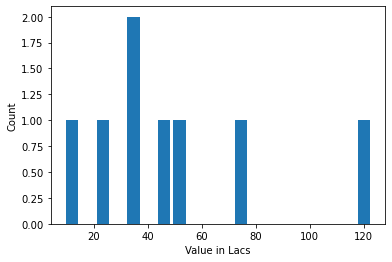

In [34]:
plt.hist(data.Value_lacs, bins=20, rwidth=0.8)
plt.xlabel('Value in Lacs')
plt.ylabel('Count')
plt.show()

#lets check the distribution of the Value_lacs column

In [35]:
upper_limit = data.Value_lacs.mean() + 2*data.Value_lacs.std()
lower_limit = data.Value_lacs.mean() - 2*data.Value_lacs.std()

upper_limit,lower_limit

#lets consider 3 standard deviation for outlier detection

(120.50026864677098, -20.750268646770976)

In [52]:
data[(data.Value_lacs>upper_limit) | (data.Value_lacs<lower_limit)] #lets check the rows having value beyond 2 std

,Location,Date,Value_lacs,Sold,zscore
0,India,21-09-2021,123,Yes,2.070789


In [53]:
data_no_outlier_std_dev = data[(data.Value_lacs<upper_limit) & (data.Value_lacs>lower_limit)]

data_no_outlier_std_dev

#lets clean the outlier and get the clean dataset

,Location,Date,Value_lacs,Sold,zscore
1,India,22-08-2021,49,Yes,-0.024779
2,India,16-09-2021,36,Yes,-0.392919
3,India,24-10-2021,9,No,-1.157518
4,India,05-06-2021,45,Yes,-0.138053
5,India,26-11-2021,36,No,-0.392919
6,India,07-11-2021,25,Yes,-0.704422
7,India,28-12-2021,76,Yes,0.739820


**Z-Score Method:**

* Z score is a way to achieve same thing that we did above using "Standard Deviation".
* Z Score Indicates how many standard deviation away a data point is.
       
          Z=X-mean(u)/standard deviation


In [54]:
data['zscore'] = (data.Value_lacs - data.Value_lacs.mean() ) / data.Value_lacs.std() #lets calculate zscore of value_lacs column

In [55]:
data.head()

,Location,Date,Value_lacs,Sold,zscore
0,India,21-09-2021,123,Yes,2.070789
1,India,22-08-2021,49,Yes,-0.024779
2,India,16-09-2021,36,Yes,-0.392919
3,India,24-10-2021,9,No,-1.157518
4,India,05-06-2021,45,Yes,-0.138053


**Above for first record with value_lacs 123,z score is 2.07. This means 123 is 2.07 standard deviation away from the mean of the value_lacs column**

**Now lets get data points that has Z score higher than 2 or lower than -2. Another way of saying same thing is get data points that are more than 2 standard deviation away.**

In [56]:
data[data['zscore']>2]

,Location,Date,Value_lacs,Sold,zscore
0,India,21-09-2021,123,Yes,2.070789


In [57]:
data[data['zscore']<-2]

,Location,Date,Value_lacs,Sold,zscore


In [59]:
data[(data.zscore<-2)|(data.zscore>2)] #lets see the outliers

,Location,Date,Value_lacs,Sold,zscore
0,India,21-09-2021,123,Yes,2.070789


In [60]:
data_no_outliers = data[(data.zscore>-2) & (data.zscore<2)]

data_no_outliers

#lets clean the outlier and get the clean dataset

,Location,Date,Value_lacs,Sold,zscore
1,India,22-08-2021,49,Yes,-0.024779
2,India,16-09-2021,36,Yes,-0.392919
3,India,24-10-2021,9,No,-1.157518
4,India,05-06-2021,45,Yes,-0.138053
5,India,26-11-2021,36,No,-0.392919
6,India,07-11-2021,25,Yes,-0.704422
7,India,28-12-2021,76,Yes,0.739820


**Thank You**